## 9.1 확률분포의 추정

‘분석하고자 하는 데이터가 어떤 확률변수로부터 실현된 표본이다’는 데이터 분석의 첫 번째 가정이다. 이 말은 우리가 정말 관심이 있는 것이 지금 손에 가지고 있는 데이터 즉, 하나의 실현체에 불과한 표본이 아니라 그 뒤에서 이 데이터를 만들어내는 **확률변수의 분포**라는 뜻이다. 확률론적인 관점에서 볼 때 데이터는 이 확률변수의 분포를 알아내기 위한 일련의 참고 자료일 뿐이다. 따라서 우리는 데이터 즉 표본으로부터 확률변수의 분포를 알아내야 한다.

### 확률분포의 결정

확률분포를 알아내는 일은 다음처럼 두 작업으로 나뉜다.

1. 확률변수가 우리가 배운 베르누이분포, 이항분포, 정규분포 등의 기본 분포 중 어떤 확률분포를 따르는지 알아낸다.
2. 데이터로부터 해당 확률분포의 모수의 값을 구한다.

첫 번째 작업 즉, 확률변수가 어떤 확률분포를 따르는가는 데이터가 생성되는 원리를 알거나 데이터의 특성을 알면 추측할 수 있다. 히스토그램을 그려서 확률분포의 모양을 살펴보고 힌트를 얻을 수도 있다.

* 데이터는 0 또는 1 뿐이다. $\rightarrow$ 베르누이분포
* 데이터는 카테고리 값이어야 한다. $\rightarrow$ 카테고리분포
* 데이터는 0과 1 사이의 실수 값이어야 한다. $\rightarrow$ 베타분포
* 데이터는 항상 0 또는 양수이어야 한다. $\rightarrow$ 로그정규분포, 감마분포, F분포, 카이제곱분포, 지수분포, 하프코시분포 등
* 데이터가 크기 제한이 없는 실수다. $\rightarrow$ 정규분포 또는 스튜던트 t분포, 코시분포, 라플라스분포 등

이 규칙에는 예외가 있을 수 있다. 예를 들어 항상 양수인 데이터인 경우에도 정규분포로 모형화가 가능하다면 정규분포를 사용할 수 있다
정규분포와 스튜던트 t분포와 같이 둘 중 어느 것인지 구분하기 힘든 경우에는 뒤에서 설명할 정규성 검정이나 KS검정을 사용한다.

#### 연습 문제 9.1.1

다음 코드로 사이킷런 패키지가 제공하는 보스턴 집값 데이터를 살펴보고 각각의 데이터의 확률분포 특성을 설명하라. 각 데이터에 적합한 확률분포가 존재한다면 어떤 확률분포인지도 설명하라.

```
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
```

### 모수 추정 방법론

두번째 작업 즉, **모수의 값으로 가장 가능성이 높은 하나의 숫자를 찾아내는 작업을 모수 추정(parameter estimation)**이라고 한다. 
모수 추정 방법에는 다음과 같은 방법들이 있다. 이 절에서는 우선 모멘트 방법을 공부한다. 최대가능도 추정법과 베이즈 추정법은 다음 절에서 공부한다.

* 모멘트 방법
* 최대가능도 추정법
* 베이즈 추정법

### 모멘트 방법

모멘트 방법(method of moment)은 표본자료에 대한 표본모멘트가 확률분포의 이론적 모멘트와 같다고 가정하여 모수를 구한다.

$$
\begin{align}
\mu = \text{E}[X] \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i
\tag{9.1.1}
\end{align}
$$

위 식에서 $N$은 데이터의 개수, $x_i$는 표본 데이터다.

2차 모멘트(분산)의 경우에는 다음과 같다.

$$
\begin{align}
\sigma^2 = \text{E}[(X-\mu)^2] \triangleq \bar{s}^2 = \dfrac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2
\tag{9.1.2}
\end{align}
$$


#### 예제: 베르누이분포의 모수 추정

모멘트 방법으로 베르누이 확률변수의 모수 $\mu$를 구하면 다음과 같다. 이 식에서 $N_1$은 1의 개수이다.

$$
\begin{align}
\text{E}[X] = \mu \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i  = \dfrac{N_1}{N}
\tag{9.1.3}
\end{align}
$$

#### 예제: 정규분포의 모수 추정

모멘트 방법으로 정규분포의 모수 $\mu$, $\sigma^2$를 구하면 다음과 같다.

$$
\begin{align}
\text{E}[X] = \mu \triangleq \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i
\tag{9.1.4}
\end{align}
$$

$$
\begin{align}
\text{E}[(X-\mu)^2] = \sigma^2 \triangleq s^2 = \dfrac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2
\tag{9.1.5}
\end{align}
$$

정규분포는 모수가 아예 모멘트로 정의되어 있기 때문에 모멘트 방법을 사용하면 아주 쉽게 모수를 추정할 수 있다.

#### 예제:  베타 분포의 모수 추정

모멘트 방법으로 베타 분포의 모수 $a$, $b$를 구하면 다음과 같다. 이 경우에는 모수와 모멘트 간의 관계를 이용하여 비선형 연립 방정식을 풀어야 한다.

$$
\begin{align}
\text{E}[X] = \dfrac{a}{a+b} \triangleq \bar{x}
\tag{9.1.6}
\end{align}
$$

$$
\begin{align}
\text{E}[(X-\mu)^2] = \dfrac{ab}{(a+b)^2(a+b+1)} \triangleq s^2
\tag{9.1.7}
\end{align}
$$


이 비선형 연립방정식을 풀어 해를 구하면 다음과 같다.

$$
\begin{align}
a = \bar{x} \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right)
\tag{9.1.8}
\end{align}
$$

$$
\begin{align}
b = (1 - \bar{x}) \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right)
\tag{9.1.9}
\end{align}
$$

예를 들어 다음과 같은 데이터 100개가 있다고 하자. 값이 항상 0과 1사이에 있으므로 베타분포를 따른다고 가정하다. 사실 이 데이터는 $a=15, b=12$인 베타분포에서 생성한 것이다.

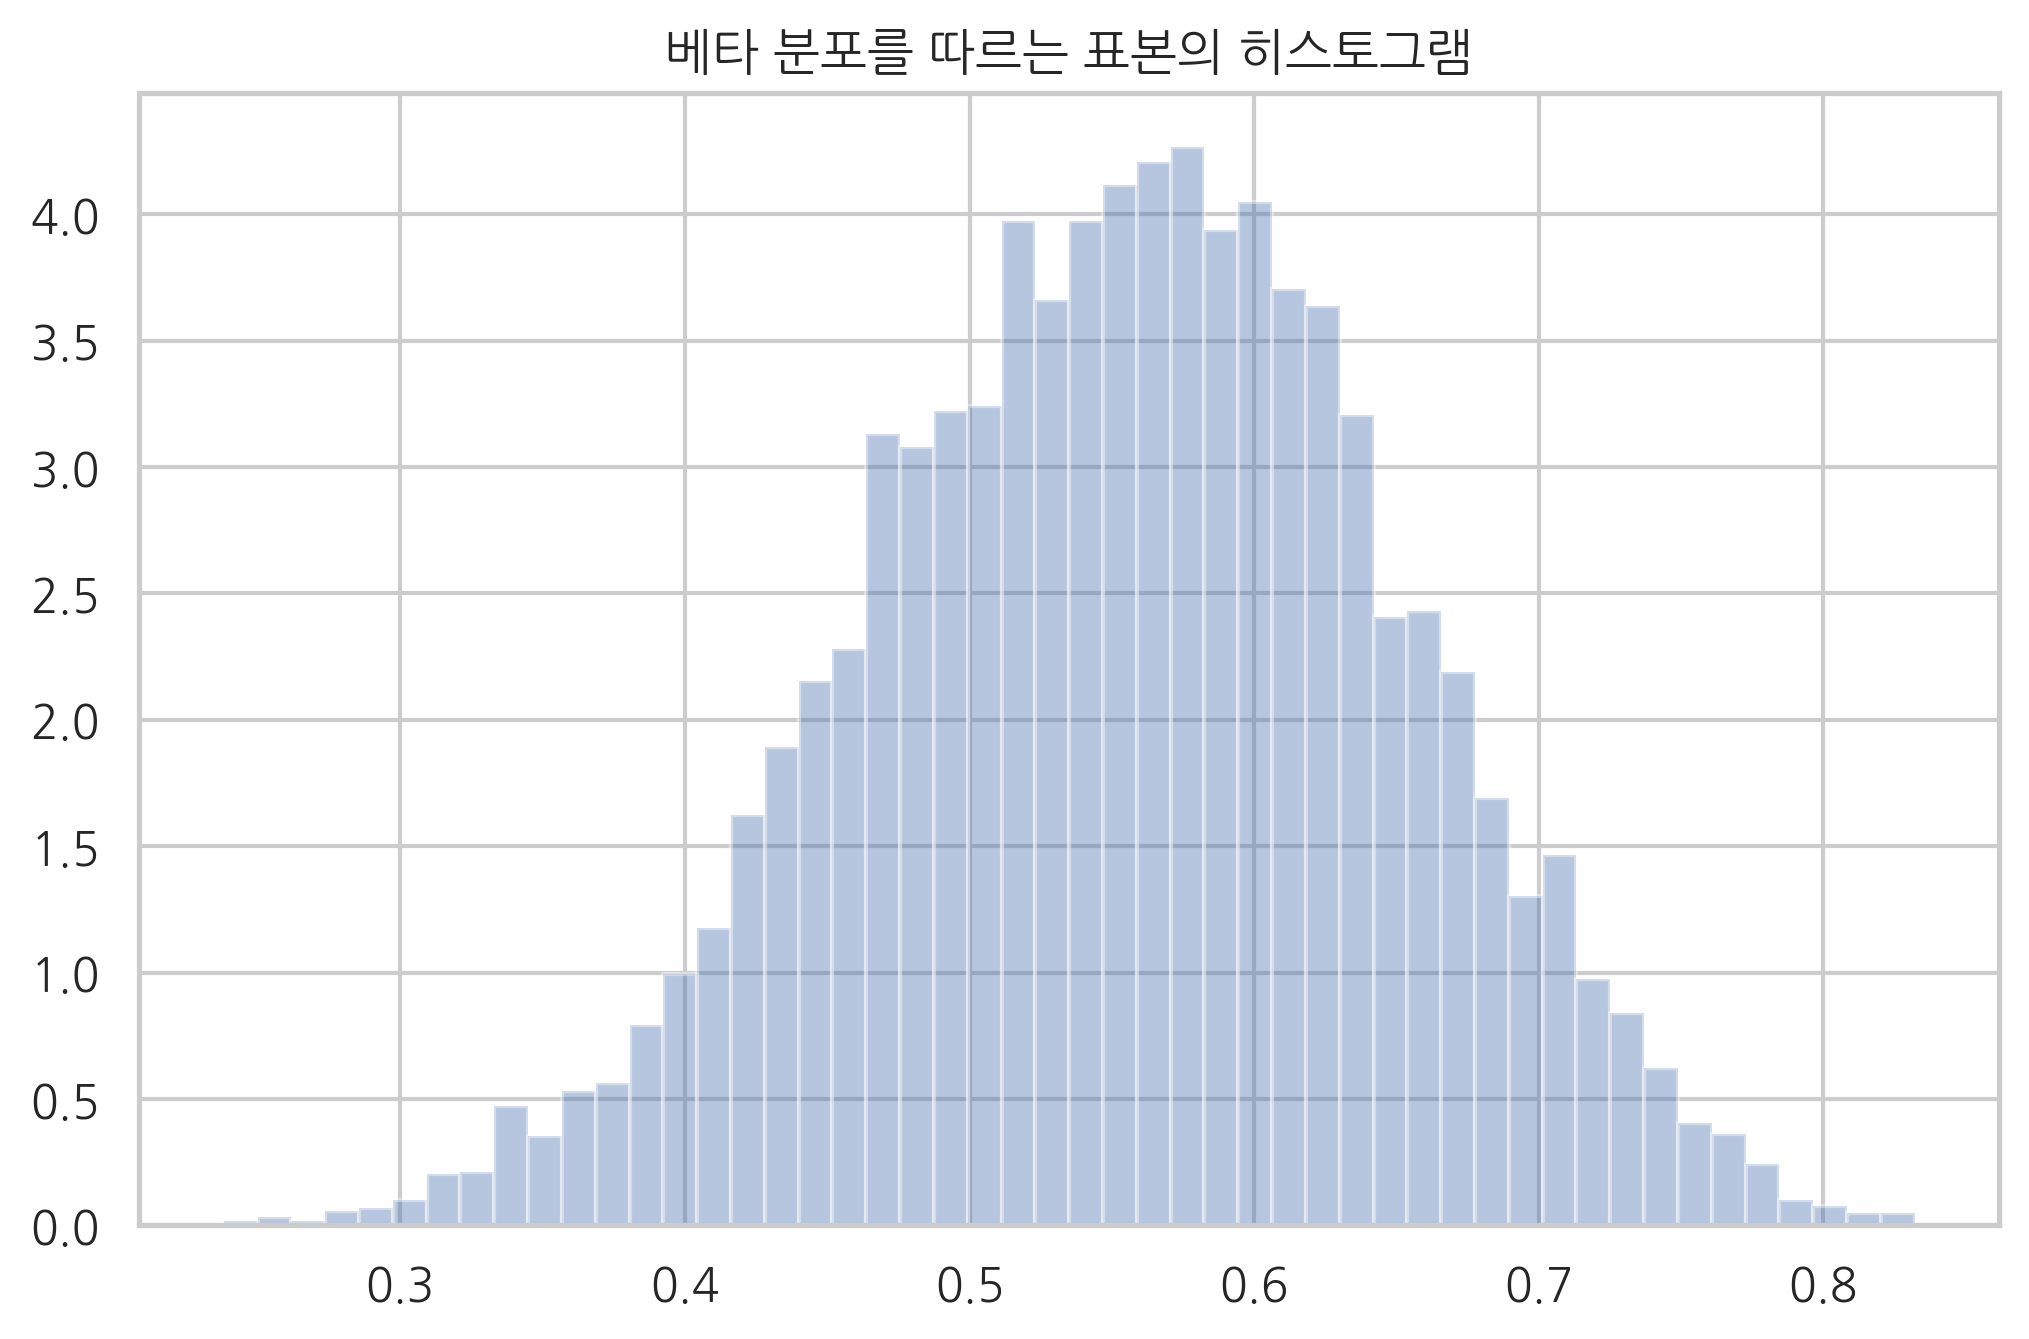

In [1]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

모멘트 방법으로 모수를 계산하면 원래의 모수와 비슷한 값을 구할 수 있다.

In [2]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


추정된 모수값으로 확률밀도분포를 그리면 히스토그램과 일치하는 것을 볼 수 있다.

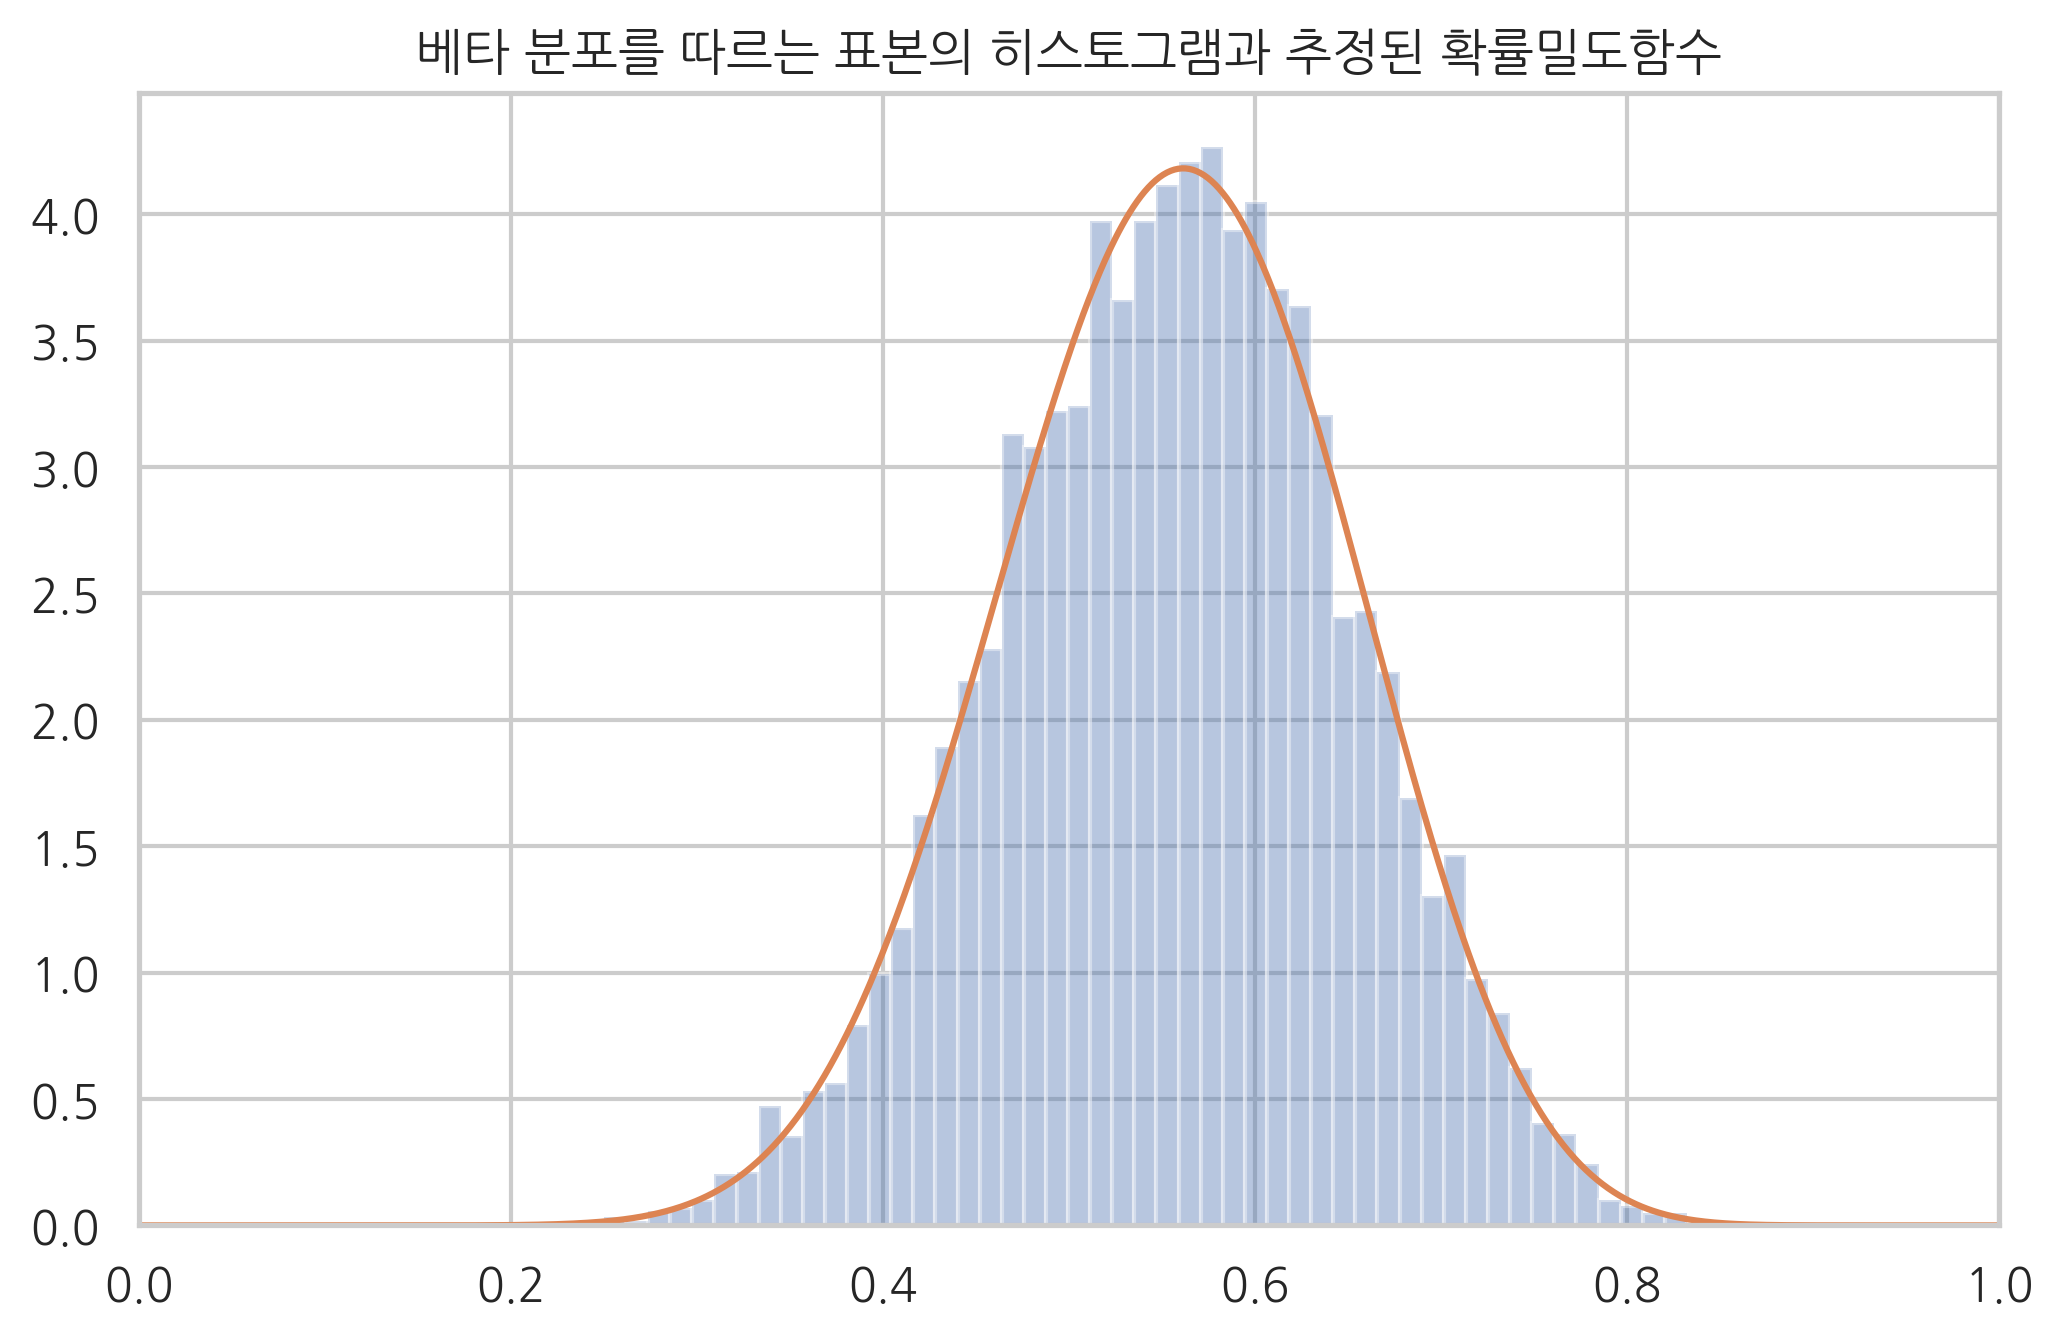

In [3]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

연속확률분포의 히스토그램을 그릴 수 있는 시본의 `distplot()` 함수에는 사실 모수 추정기능이 포함되어 있다. `fit`인수로 사이파이의 확률변수 명령을 넣으면 이 명령을 사용하여 모수를 추정한 뒤에 해당 확률밀도함수 그래프를 히스토그램과 함께 보여준다. 

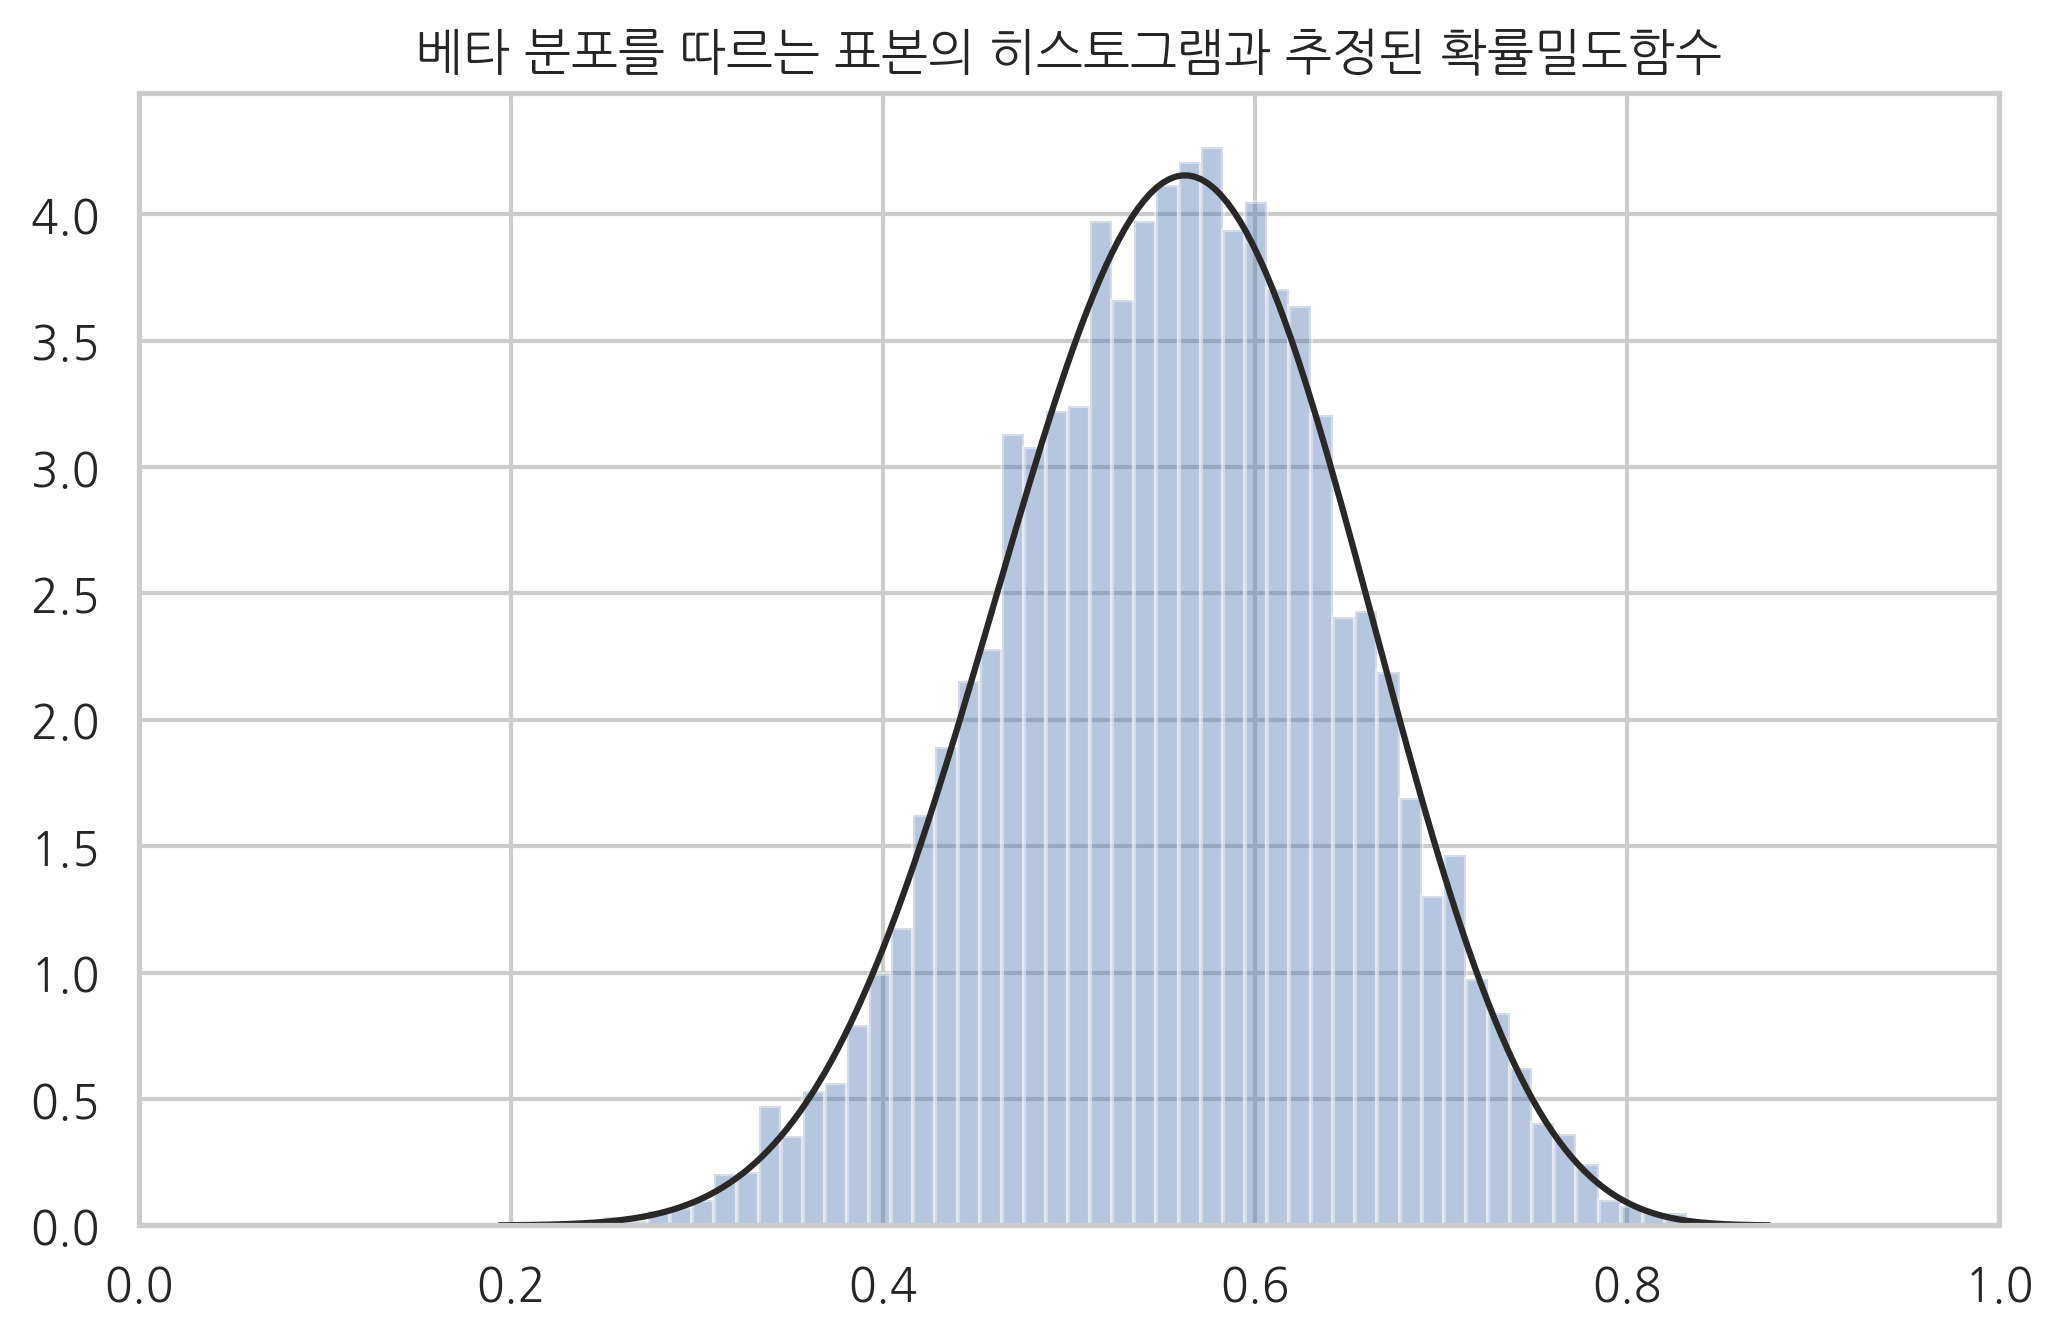

In [4]:
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

#### 연습 문제 9.1.2

위 연습 문제에서 나온 보스턴 집값 데이터 각각에 대해 시본의 `distplot()` 함수로 히스토그램을 그려라. 그리고 `distplot()` 함수의 모수 추정 기능을 사용하여 각각의 데이터에 적합한 확률분포의 확률밀도함수를 그려라. (범주형 데이터는 제외한다.)